
# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [33]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [34]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [35]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [36]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [37]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [38]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [39]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [40]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [41]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [42]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [43]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [44]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [45]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [46]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"
           ]

In [47]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████| 109248/109248 [01:34<00:00, 1150.98it/s]


In [48]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [49]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
#before preprocessing
pd.Series(project_data['project_title']).head(10)
#after preprocessing
from tqdm import tqdm
processed_title= []
pd.Series(project_data['project_title']).head(10)
for sentance in (project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace("-","_")
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280a
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    processed_title.append(sent.lower().strip())

In [50]:
#Teacher_prefix 

preprocessed_prefix = []
for i in (project_data['teacher_prefix'].values):
    preprocessed_prefix.append(re.sub("[ ,.]", "", str(i)))
project_data['clean_prefix']=preprocessed_prefix
    
from collections import Counter
my_counter = Counter()
for word in project_data['clean_prefix'].values:
    my_counter.update(word.split())
pd.Series(my_counter)
teach_prefix=dict(my_counter)
vectorizer = CountVectorizer(vocabulary=list(teach_prefix.keys()), lowercase=False, binary=False)
vectorizer.fit(project_data['clean_prefix'].values)
print(vectorizer.get_feature_names())
print(project_data['clean_prefix'].value_counts())

['Mrs', 'Mr', 'Ms', 'Teacher', 'nan', 'Dr']
Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
nan            3
Name: clean_prefix, dtype: int64


In [51]:
#################
# project_grade_category
preprocessed_grade=[]
for i in (project_data['project_grade_category'].values):
    grade1=re.sub(" ", "_", str(i))
    preprocessed_grade.append(re.sub("-", "_", grade1))
project_data['clean_grade']= preprocessed_grade
project_data['clean_grade'].value_counts()

Grades_PreK_2    44225
Grades_3_5       37137
Grades_6_8       16923
Grades_9_12      10963
Name: clean_grade, dtype: int64

## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [52]:
project_data1=project_data.groupby('id').agg({'teacher_number_of_previously_posted_projects':'sum'}).reset_index()

### 1.5.3 Vectorizing Numerical features

In [53]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [54]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [55]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [56]:
project_data['processed_titles']=processed_title
project_data.columns
project_data.head()
project_data['processed_essays']=preprocessed_essays
project_data.drop(['essay','project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
project_data.head()
project_data.drop(['project_grade_category','teacher_prefix'], axis=1, inplace=True)

In [57]:
#set1
X1=project_data
y = X1['project_is_approved'].values


In [58]:
set1=X1.drop(['Unnamed: 0','id','teacher_id','project_resource_summary','project_submitted_datetime','project_is_approved'], axis=1)
set1.count()

school_state                                    109248
project_title                                   109248
teacher_number_of_previously_posted_projects    109248
clean_categories                                109248
clean_subcategories                             109248
clean_prefix                                    109248
clean_grade                                     109248
price                                           109248
quantity                                        109248
processed_titles                                109248
processed_essays                                109248
dtype: int64

In [59]:
set1.shape

(109248, 11)

In [60]:
set1.drop('quantity',axis=1,inplace=True)

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [61]:
#split the data
from sklearn.model_selection import train_test_split
set1_train, set1_test, y_train, y_test = train_test_split(set1, y, test_size=0.40, stratify=y)
print(set1_train.shape,y_train.shape)
print(set1_test.shape,y_test.shape)



(65548, 10) (65548,)
(43700, 10) (43700,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [62]:
#encoding categorical and numerical feautres
#school state
vectorizer1 = CountVectorizer()
vectorizer1.fit(set1_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_state_ohe = vectorizer1.transform(set1_train['school_state'].values)
set1_test_state_ohe = vectorizer1.transform(set1_test['school_state'].values)

print("After one hot encoding of categorical data of school_state")
print(set1_train_state_ohe.shape, y_train.shape)
print(set1_test_state_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names())
print("="*100)
#################################################################################################################################
#clean categories
vectorizer2= CountVectorizer()
vectorizer2.fit(set1_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_categories_ohe = vectorizer2.transform(set1_train['clean_categories'].values)
set1_test_categories_ohe = vectorizer2.transform(set1_test['clean_categories'].values)

print("After one hot encoding of categories")
print(set1_train_categories_ohe.shape, y_train.shape)
print(set1_test_categories_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)
#################################################################################################################################
#clean sub-categories
vectorizer3 = CountVectorizer()
vectorizer3.fit(set1_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_subcategories_ohe = vectorizer3.transform(set1_train['clean_subcategories'].values)
set1_test_subcategories_ohe = vectorizer3.transform(set1_test['clean_subcategories'].values)

print("After one hot encoding of subcategories")
print(set1_train_subcategories_ohe.shape, y_train.shape)
print(set1_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)
#################################################################################################################################
#project_grade_category
vectorizer4 = CountVectorizer()
vectorizer4.fit(set1_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_grade_ohe = vectorizer4.transform(set1_train['clean_grade'].values)
set1_test_grade_ohe = vectorizer4.transform(set1_test['clean_grade'].values)

print("After one hot encoding of grade")
print(set1_train_grade_ohe.shape, y_train.shape)
print(set1_test_grade_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)
#################################################################################################################################
#teacher_prefix
vectorizer5 = CountVectorizer()
vectorizer5.fit(set1_train['clean_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set1_train_prefix_ohe = vectorizer5.transform(set1_train['clean_prefix'].values)
set1_test_prefix_ohe = vectorizer5.transform(set1_test['clean_prefix'].values)

print("After  one hot encoding of teacher prefix")
print(set1_train_prefix_ohe.shape, y_train.shape)
print(set1_test_prefix_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#numerical feautres
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(set1_train['price'].values.reshape(-1,1))

set1_train_price_norm = normalizer.transform(set1_train['price'].values.reshape(-1,1))
set1_test_price_norm = normalizer.transform(set1_test['price'].values.reshape(-1,1))

print("After normaliztion of numerical feautre price")
print(set1_train_price_norm.shape, y_train.shape)
print(set1_test_price_norm.shape, y_test.shape)
print("="*100)

###############################################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set1_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

set1_train_previously_posted_norm = normalizer1.transform(set1_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
set1_test_previously_posted_norm = normalizer1.transform(set1_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After normaliztion of numerical feautre teacher_number_of_previously_posted_projects ")
print(set1_train_previously_posted_norm.shape, y_train.shape)
print(set1_test_previously_posted_norm.shape, y_test.shape)
print("="*100)
###############################################################******************************************************************          


After one hot encoding of categorical data of school_state
(65548, 51) (65548,)
(43700, 51) (43700,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After one hot encoding of categories
(65548, 9) (65548,)
(43700, 9) (43700,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
After one hot encoding of subcategories
(65548, 30) (65548,)
(43700, 30) (43700,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'heal

In [31]:
# encoding numerical faeutres with probablity 

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [32]:
#vectorzig essays
from sklearn.feature_extraction.text import CountVectorizer
vectorizer6 = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=3000)
vectorizer6.fit(set1_train['processed_essays'].values) # fit has to happen only on train data

set1_train_essay_bow = vectorizer6.transform(set1_train['processed_essays'].values)
set1_test_essay_bow = vectorizer6.transform(set1_test['processed_essays'].values)

print("After vectorizations of essays with bag of words range 1,2,3")
print(set1_train_essay_bow.shape, y_train.shape)  
print(set1_test_essay_bow.shape, y_test.shape)
print("="*100)

#vectorize title
vectorizer7 = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=3000)
vectorizer7.fit(set1_train['processed_titles'].values) 
set1_train_title_bow = vectorizer7.transform(set1_train['processed_titles'].values)
set1_test_title_bow = vectorizer7.transform(set1_test['processed_titles'].values)

print("After vectorizations of title with bag of words range 1,2,3")
print(set1_train_title_bow.shape, y_train.shape)#vectrozing the test train cv seperately
print(set1_test_title_bow.shape, y_test.shape)
print("="*100)

from scipy.sparse import hstack
set1_tr = hstack((set1_train_essay_bow,set1_train_title_bow,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set1_te = hstack((set1_test_essay_bow,set1_test_title_bow,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set1_tr.shape, y_train.shape)
print(set1_te.shape, y_test.shape)
print("="*100)

After vectorizations of essays with bag of words range 1,2,3
(65548, 3000) (65548,)
(43700, 3000) (43700,)
After vectorizations of title with bag of words range 1,2,3
(65548, 2498) (65548,)
(43700, 2498) (43700,)
Final Data matrix
(65548, 5600) (65548,)
(43700, 5600) (43700,)


In [374]:
feature_names_set1_tr=[]
feature_names_set1_tr.extend(vectorizer6.get_feature_names())
feature_names_set1_tr.extend(vectorizer7.get_feature_names())
feature_names_set1_tr.extend(vectorizer1.get_feature_names())
feature_names_set1_tr.extend(vectorizer2.get_feature_names())
feature_names_set1_tr.extend(vectorizer3.get_feature_names())
feature_names_set1_tr.extend(vectorizer4.get_feature_names())
feature_names_set1_tr.extend(vectorizer5.get_feature_names())
feature_names_set1_tr.extend(['price'])
feature_names_set1_tr.extend(['teacher_number_of_previously_posted_projects'])


In [375]:
len(feature_names_set1_tr)

5573

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import seaborn as sns

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# https://qiita.com/bmj0114/items/8009f282c99b77780563 code got from here


model = DecisionTreeClassifier(class_weight= "balanced")

max_depth = [1,5,10,50,100,500,1000]
min_samples_split=[5,10,15,25,500]


grid = {'max_depth': max_depth,
        'min_samples_split':min_samples_split}

clf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, 
                             cv=5, verbose=2, return_train_score=True,scoring='roc_auc')


clf.fit(set1_tr, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 122.7min
[Parallel(n_jobs=4)]: Done 175 out of 175 | elapsed: 139.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 15, 25, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

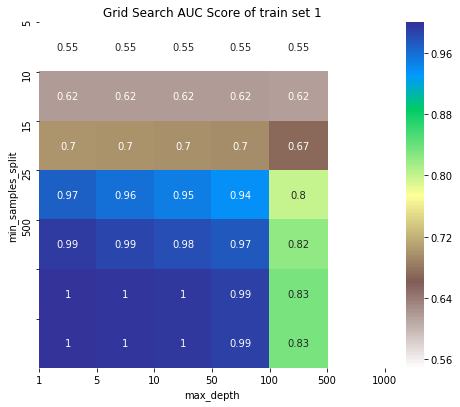

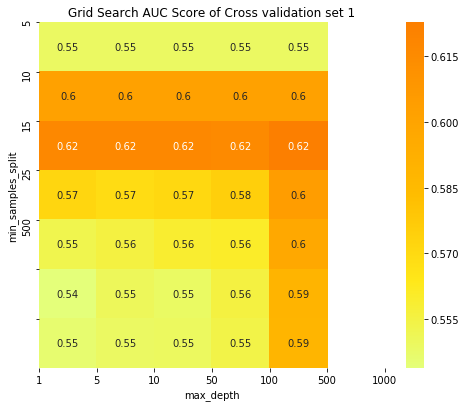

In [35]:
#scores = clf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(min_samples_leaf))

train_auc= clf.cv_results_['mean_train_score'].reshape(len(max_depth),len(min_samples_split))
train_auc_std= clf.cv_results_['std_train_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc_std= clf.cv_results_['std_test_score'].reshape(len(max_depth),len(min_samples_split))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(train_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(corr, mask=mask, vmax=.3, square=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
sns.heatmap(train_auc, cmap="terrain_r",annot=True)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of train set 1')
plt.show()


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(cv_auc,vmax=.3, square=True)
sns.heatmap(cv_auc, cmap="Wistia",annot=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of Cross validation set 1')
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [47]:
import os
os.environ["PATH"] += os.pathsep + 'c:/Program Files (x86)/Graphviz2.38/bin/'

In [401]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
best_depth=8
min_sample_split=15
clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=min_sample_split,class_weight='balanced')
clf.fit(set1_tr, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

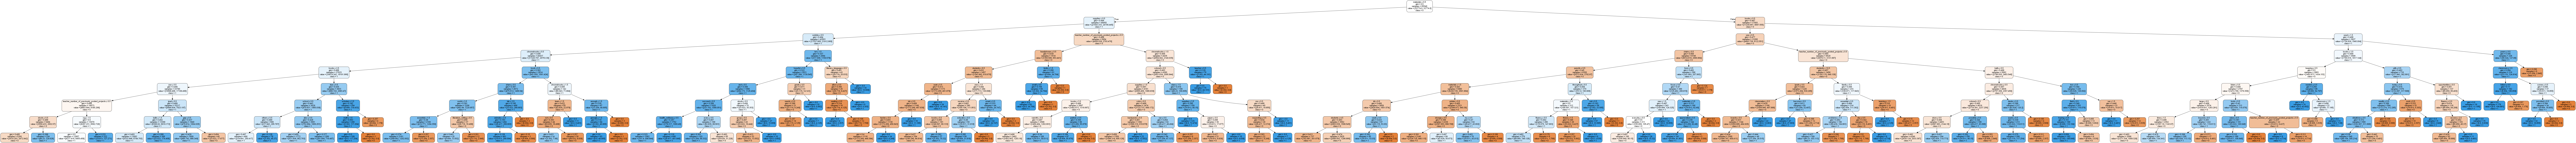

In [429]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names=feature_names_set1_tr,
                filled=True, rounded=True,class_names=['0','1'],
                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [39]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

C:\Users\thribhuvan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



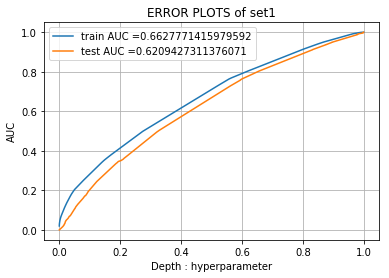

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

best_depth=8
min_sample_split=15
clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=min_sample_split,class_weight='balanced')
clf.fit(set1_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set1_tr)    
y_test_pred = batch_predict(clf, set1_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set1")
plt.grid()
plt.show()

In [48]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

the maximum value of tpr*(1-fpr) 0.36365492755271167 for threshold 0.485
the maximum value of tpr*(1-fpr) 0.3384579244487197 for threshold 0.485


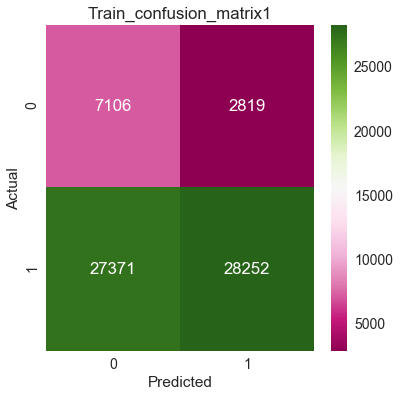

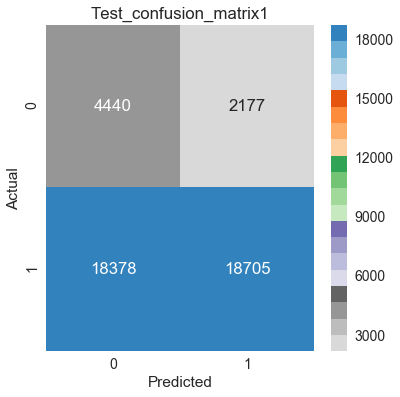

In [49]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

# word cloud of set1 essay

In [64]:
fpr_set1=set1_test
fpr_set1['slno']=np.arange(len(set1_test))
#fpr_set1.drop('slno',axis=1,inplace=True)

In [65]:
app=[]
fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.485 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    fpr_values.append(fpr_set1.iloc[app[j],:])
fpr_set1_te=pd.DataFrame(fpr_values)   
    
    

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer10 = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=3000)
vectorizer10.fit_transform(fpr_set1_te['processed_essays'].values) # fit has to happen only on train data

print("After vectorizations of essays with bag of words range 1") 


After vectorizations of essays with bag of words range 1


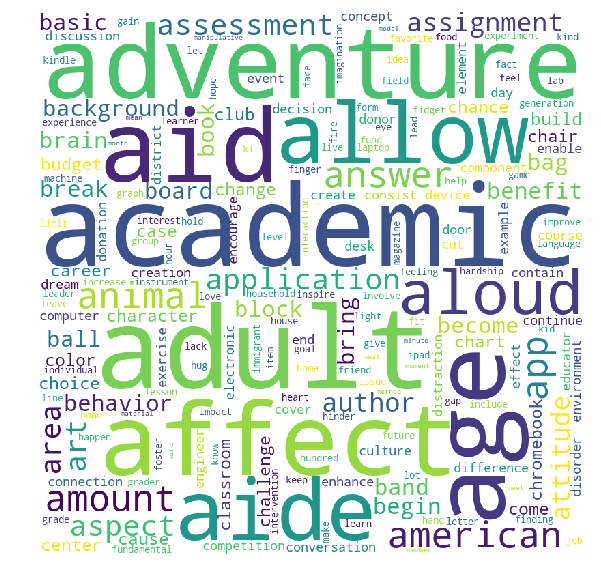

In [72]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in list(vectorizer10.get_feature_names()): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


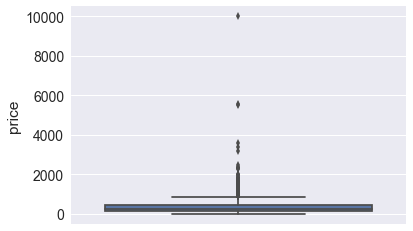

In [67]:
app=[]
y_fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.485 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    y_fpr_values.append(y_test[app[j]]) 

fpr_set1_te["fpr_y"]=y_fpr_values
sns.boxplot(y='price', hue="fpr_y",data=fpr_set1_te)
plt.show()



Index(['fpr_y'], dtype='object')

C:\Users\thribhuvan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



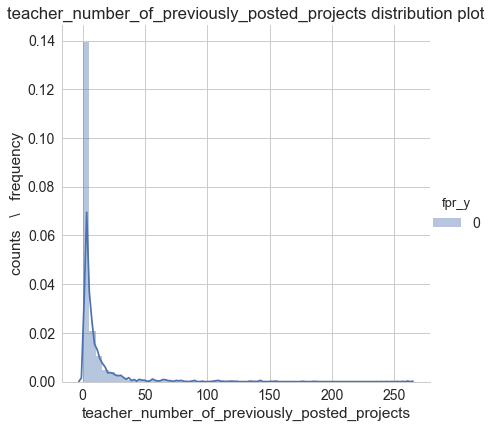

In [68]:
sns.set_style("whitegrid");
sns.FacetGrid(fpr_set1_te,hue="fpr_y", size=6) \
   .map(sns.distplot,'teacher_number_of_previously_posted_projects')\
   .add_legend();
plt.ylabel('counts   \   frequency')
plt.title('teacher_number_of_previously_posted_projects distribution plot')
plt.show();

##summary : many falsely predicted values lie in the less than 500 and teacher accomplished projects lie less than 20

In [33]:
from sklearn.model_selection import train_test_split
set2_train, set2_test, y_train, y_test = train_test_split(set1, y, test_size=0.40, stratify=y)
print(set2_train.shape,y_train.shape)
print(set2_test.shape,y_test.shape)

(65548, 10) (65548,)
(43700, 10) (43700,)


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer11 = TfidfVectorizer(min_df=10,ngram_range=(1,1), max_features=5000)
vectorizer11.fit(set2_train['processed_essays'].values) # fit has to happen only on train data

set2_train_essay_tfidf = vectorizer11.transform(set2_train['processed_essays'].values)
set2_test_essay_tfidf = vectorizer11.transform(set2_test['processed_essays'].values)

print("After vectorizations of essays with tfidf range 1,1")
print(set2_train_essay_tfidf.shape, y_train.shape)
print(set2_test_essay_tfidf.shape, y_test.shape)
print("="*100)

#vectorize title
vectorizer12 = TfidfVectorizer(min_df=10,ngram_range=(1,1), max_features=5000)
vectorizer12.fit(set2_train['processed_titles'].values) # fit has to happen only on train data

set2_train_title_tfidf = vectorizer12.transform(set2_train['processed_titles'].values)
set2_test_title_tfidf = vectorizer12.transform(set2_test['processed_titles'].values)

print("After vectorizations of title with TFIDF range 1,2")
print(set2_train_title_tfidf.shape, y_train.shape)
print(set2_test_title_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations of essays with tfidf range 1,1
(65548, 5000) (65548,)
(43700, 5000) (43700,)
After vectorizations of title with TFIDF range 1,2
(65548, 2467) (65548,)
(43700, 2467) (43700,)


In [35]:
#encoding categorical and numerical feautres
#school state
vectorizer1 = CountVectorizer()
vectorizer1.fit(set2_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set2_train_state_ohe = vectorizer1.transform(set2_train['school_state'].values)
set2_test_state_ohe = vectorizer1.transform(set2_test['school_state'].values)

print("After one hot encoding of categorical data of school_state")
print(set2_train_state_ohe.shape, y_train.shape)
print(set2_test_state_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names())
print("="*100)
#################################################################################################################################
#clean categories
vectorizer2= CountVectorizer()
vectorizer2.fit(set2_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set2_train_categories_ohe = vectorizer2.transform(set2_train['clean_categories'].values)
set2_test_categories_ohe = vectorizer2.transform(set2_test['clean_categories'].values)

print("After one hot encoding of categories")
print(set2_train_categories_ohe.shape, y_train.shape)
print(set2_test_categories_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)
#################################################################################################################################
#clean sub-categories
vectorizer3 = CountVectorizer()
vectorizer3.fit(set2_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set2_train_subcategories_ohe = vectorizer3.transform(set2_train['clean_subcategories'].values)
set2_test_subcategories_ohe = vectorizer3.transform(set2_test['clean_subcategories'].values)

print("After one hot encoding of subcategories")
print(set2_train_subcategories_ohe.shape, y_train.shape)
print(set2_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)
#################################################################################################################################
#project_grade_category
vectorizer4 = CountVectorizer()
vectorizer4.fit(set2_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set2_train_grade_ohe = vectorizer4.transform(set2_train['clean_grade'].values)
set2_test_grade_ohe = vectorizer4.transform(set2_test['clean_grade'].values)

print("After one hot encoding of grade")
print(set2_train_grade_ohe.shape, y_train.shape)
print(set2_test_grade_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)
#################################################################################################################################
#teacher_prefix
vectorizer5 = CountVectorizer()
vectorizer5.fit(set2_train['clean_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
set2_train_prefix_ohe = vectorizer5.transform(set2_train['clean_prefix'].values)
set2_test_prefix_ohe = vectorizer5.transform(set2_test['clean_prefix'].values)

print("After  one hot encoding of teacher prefix")
print(set2_train_prefix_ohe.shape, y_train.shape)
print(set2_test_prefix_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#numerical feautres
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(set2_train['price'].values.reshape(-1,1))

set2_train_price_norm = normalizer.transform(set2_train['price'].values.reshape(-1,1))
set2_test_price_norm = normalizer.transform(set2_test['price'].values.reshape(-1,1))

print("After normaliztion of numerical feautre price")
print(set2_train_price_norm.shape, y_train.shape)
print(set2_test_price_norm.shape, y_test.shape)
print("="*100)

###############################################################################################################################
normalizer1 = Normalizer()
normalizer1.fit(set2_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

set2_train_previously_posted_norm = normalizer1.transform(set2_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
set2_test_previously_posted_norm = normalizer1.transform(set2_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After normaliztion of numerical feautre teacher_number_of_previously_posted_projects ")
print(set2_train_previously_posted_norm.shape, y_train.shape)
print(set2_test_previously_posted_norm.shape, y_test.shape)
print("="*100)

After one hot encoding of categorical data of school_state
(65548, 51) (65548,)
(43700, 51) (43700,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After one hot encoding of categories
(65548, 9) (65548,)
(43700, 9) (43700,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
After one hot encoding of subcategories
(65548, 30) (65548,)
(43700, 30) (43700,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'heal

In [37]:
from scipy.sparse import hstack
set2_tr = hstack((set2_train_essay_tfidf,set2_train_title_tfidf,set2_train_state_ohe,set2_train_categories_ohe,set2_train_subcategories_ohe,set2_train_grade_ohe,set2_train_prefix_ohe,set2_train_price_norm,set2_train_previously_posted_norm)).tocsr()
set2_te = hstack((set2_test_essay_tfidf,set2_test_title_tfidf,set2_test_state_ohe,set2_test_categories_ohe,set2_test_subcategories_ohe,set2_test_grade_ohe,set2_test_prefix_ohe,set2_test_price_norm,set2_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set2_tr.shape, y_train.shape)
print(set2_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(65548, 7569) (65548,)
(43700, 7569) (43700,)


In [115]:
import seaborn as sns

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# https://qiita.com/bmj0114/items/8009f282c99b77780563 code got from here


model = DecisionTreeClassifier(class_weight= "balanced")

max_depth = [1,5,10,50,100,500,1000]
min_samples_split=[5,10,15,25,500]


grid = {'max_depth': max_depth,
        'min_samples_split':min_samples_split}

clf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring='roc_auc')


clf.fit(set2_tr, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 247.0min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 296.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 15, 25, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

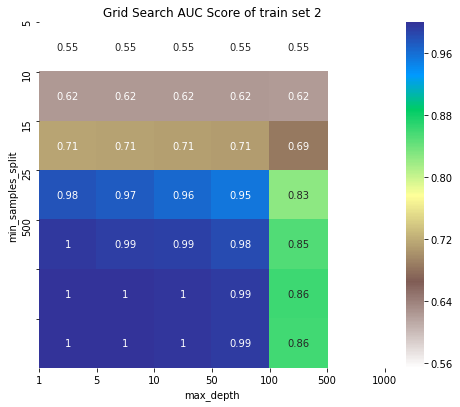

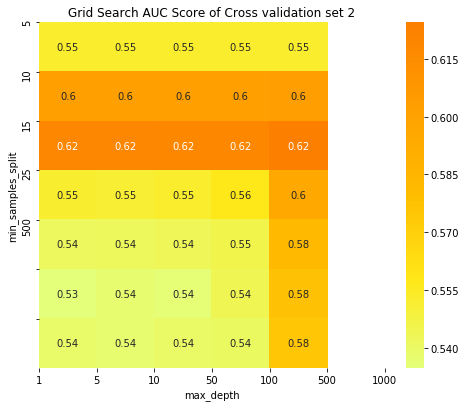

In [41]:
#scores = clf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(min_samples_leaf))

train_auc= clf.cv_results_['mean_train_score'].reshape(len(max_depth),len(min_samples_split))
train_auc_std= clf.cv_results_['std_train_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc_std= clf.cv_results_['std_test_score'].reshape(len(max_depth),len(min_samples_split))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(train_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(corr, mask=mask, vmax=.3, square=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
sns.heatmap(train_auc, cmap="terrain_r",annot=True)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of train set 2')
plt.show()


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(cv_auc,vmax=.3, square=True)
sns.heatmap(cv_auc, cmap="Wistia",annot=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of Cross validation set 2')
plt.show()

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [116]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

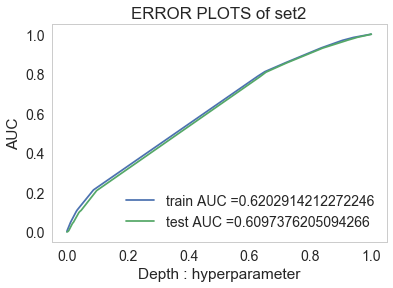

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

best_depth=5
min_sample_split=15
clf1 = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=min_sample_split,class_weight='balanced')
clf1.fit(set2_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf1, set2_tr)    
y_test_pred = batch_predict(clf1, set2_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set2")
plt.grid()
plt.show()

In [48]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
best_depth=3
min_sample_split=15
clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=min_sample_split,class_weight='balanced')
clf.fit(set2_tr, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
feature_names_set2_tr=[]
feature_names_set2_tr.extend(vectorizer11.get_feature_names())
feature_names_set2_tr.extend(vectorizer12.get_feature_names())
feature_names_set2_tr.extend(vectorizer1.get_feature_names())
feature_names_set2_tr.extend(vectorizer2.get_feature_names())
feature_names_set2_tr.extend(vectorizer3.get_feature_names())
feature_names_set2_tr.extend(vectorizer4.get_feature_names())
feature_names_set2_tr.extend(vectorizer5.get_feature_names())
feature_names_set2_tr.extend(['price'])
feature_names_set2_tr.extend(['teacher_number_of_previously_posted_projects'])


In [58]:
len(feature_names_set2_tr)

7595

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

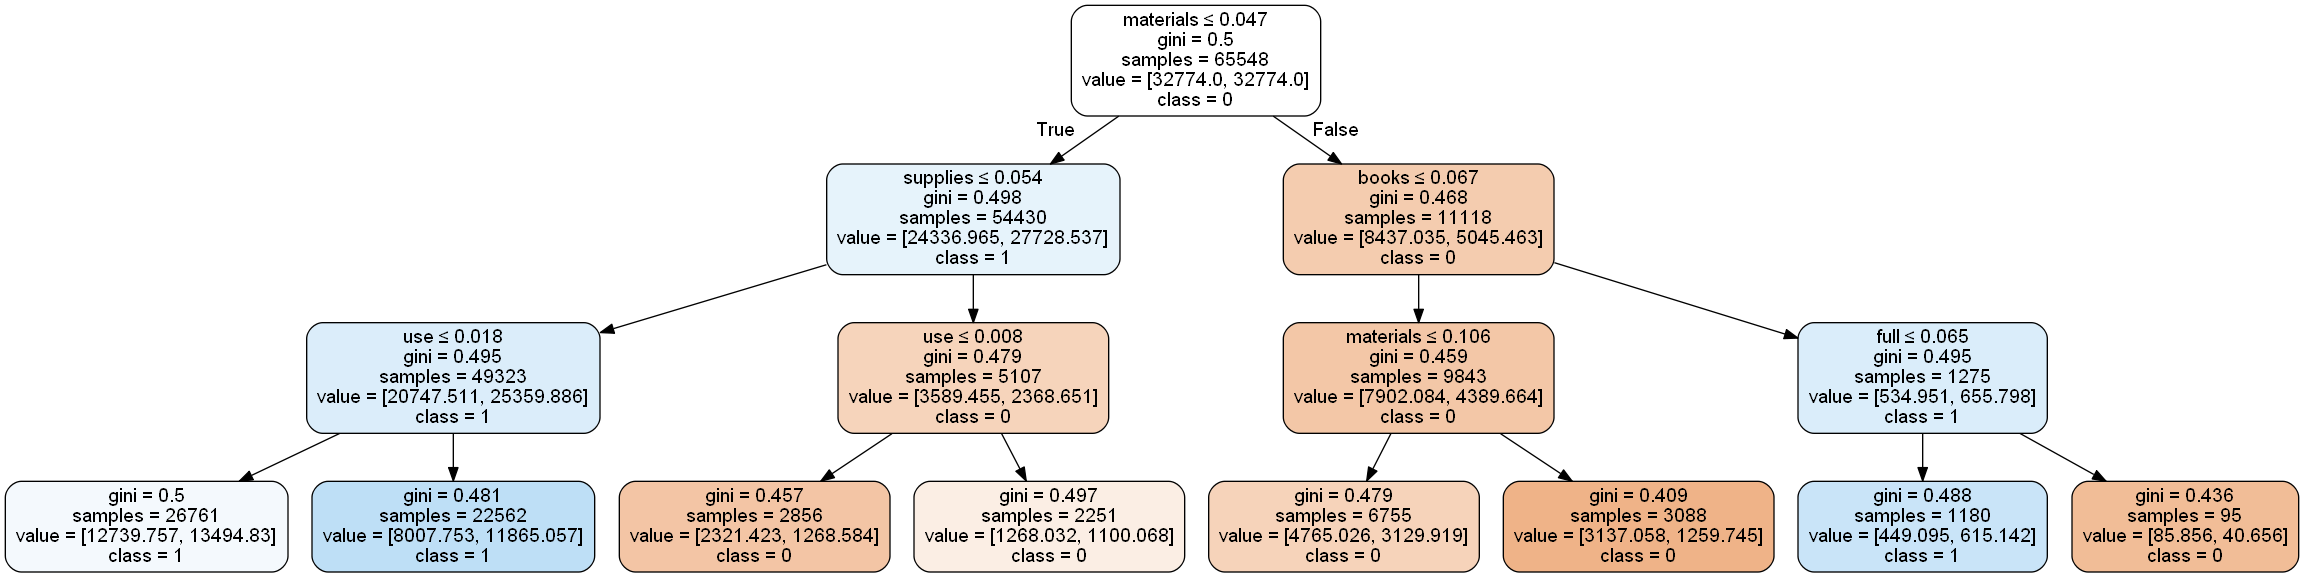

In [54]:
# Please write all the code with proper documentationfrom sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names=feature_names_set2_tr,
                filled=True, rounded=True,class_names=['0','1'],
                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

In [118]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

the maximum value of tpr*(1-fpr) 0.2936910383238074 for threshold 0.516
the maximum value of tpr*(1-fpr) 0.2870324292974815 for threshold 0.516


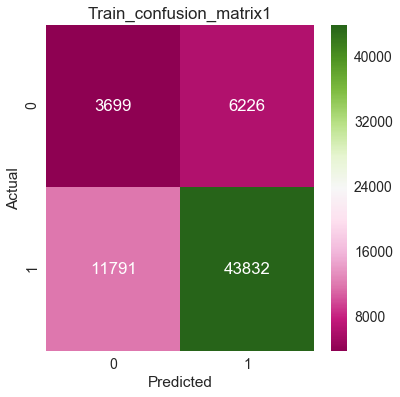

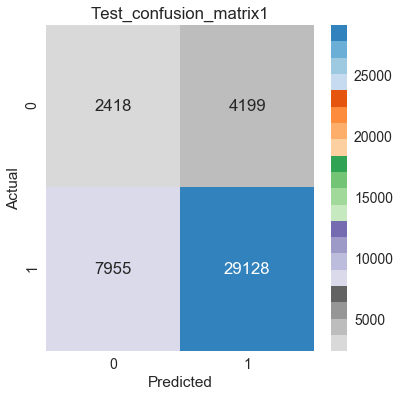

In [119]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

In [123]:
fpr_set2_te=set2_test
#fpr_set2['slno']=np.arange(len(set2_test))
#fpr_set2.drop('slno',axis=1,inplace=True)

In [124]:
app=[]
fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.519 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    fpr_values.append(fpr_set2.iloc[app[j],:])
fpr_set2_te=pd.DataFrame(fpr_values)   
    
    

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer13 = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=3000)
vectorizer13.fit_transform(fpr_set2_te['processed_essays'].values) # fit has to happen only on train data

<646x1207 sparse matrix of type '<class 'numpy.int64'>'
	with 54735 stored elements in Compressed Sparse Row format>

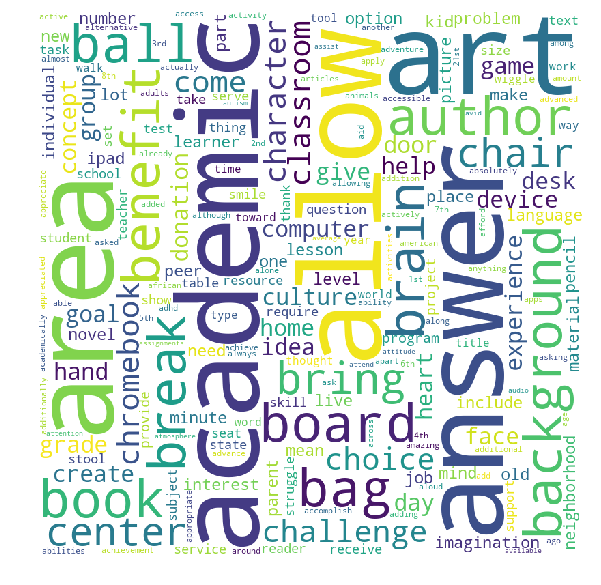

In [126]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in list(vectorizer13.get_feature_names()): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


No handles with labels found to put in legend.


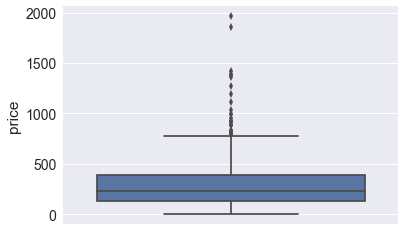

In [127]:
app=[]
y_fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.519 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    y_fpr_values.append(y_test[app[j]]) 

fpr_set2_te["fpr_y"]=y_fpr_values
sns.boxplot(y='price', hue="fpr_y",data=fpr_set2_te)
plt.legend()
plt.show()

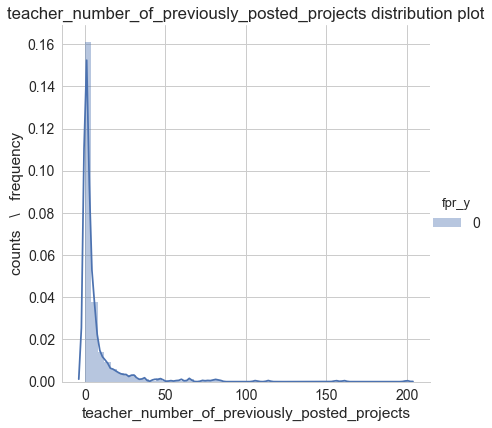

In [128]:
sns.set_style("whitegrid");
sns.FacetGrid(fpr_set2_te,hue="fpr_y", size=6) \
   .map(sns.distplot,'teacher_number_of_previously_posted_projects')\
   .add_legend();
plt.ylabel('counts   \   frequency')
plt.title('teacher_number_of_previously_posted_projects distribution plot')
plt.show();

## SET 3

In [63]:
from sklearn.model_selection import train_test_split
set3_train, set3_test, y_train, y_test = train_test_split(set1, y, test_size=0.40, stratify=y)
print(set3_train.shape,y_train.shape)
print(set3_test.shape,y_test.shape)

(65548, 10) (65548,)
(43700, 10) (43700,)


In [64]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [65]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_train = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_train['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_train.append(vector)

print(len(avg_w2v_essays_train))
print(len(avg_w2v_essays_train[0]))
print("*"*100)

avg_w2v_essays_test= [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_test['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_test.append(vector)


print(len(avg_w2v_essays_test))
print(len(avg_w2v_essays_test[0]))

print("*"*100)

print("Tittle")

#title
avg_w2v_titles_train = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_train['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_train.append(vector)

print(len(avg_w2v_titles_train))
print(len(avg_w2v_titles_train[0]))
print("*"*100)

avg_w2v_titles_test= [] # the avg-w2v for each sentence/review is stored in this list
for sentence in (set3_test['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_test.append(vector)


print(len(avg_w2v_titles_test))
print(len(avg_w2v_titles_test[0]))

print("*"*100)

65548
300
****************************************************************************************************
43700
300
****************************************************************************************************
Tittle
65548
300
****************************************************************************************************
43700
300
****************************************************************************************************


In [67]:
#concatinating all the feautres of given in set1
from scipy.sparse import hstack
set3_tr = hstack((avg_w2v_essays_train,avg_w2v_titles_train,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set3_te = hstack((avg_w2v_essays_test,avg_w2v_titles_test,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set3_tr.shape, y_train.shape)
print(set3_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(65548, 702) (65548,)
(43700, 702) (43700,)


In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# https://qiita.com/bmj0114/items/8009f282c99b77780563 code got from here


model = DecisionTreeClassifier(class_weight= "balanced")

max_depth = [1,5,10,50,100,500,1000]
min_samples_split=[5,10,15,25,500]


grid = {'max_depth': max_depth,
        'min_samples_split':min_samples_split}

clf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, 
                             cv=5, verbose=2, return_train_score=True,scoring='roc_auc')


clf.fit(set3_tr, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 12.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 423.2min
[Parallel(n_jobs=4)]: Done 175 out of 175 | elapsed: 475.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 15, 25, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

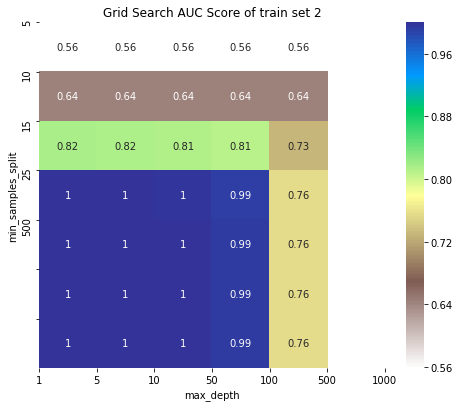

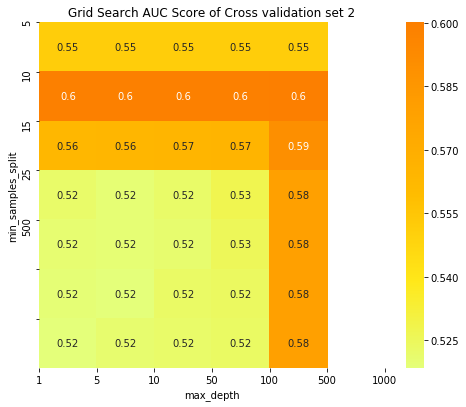

In [38]:
#scores = clf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(min_samples_leaf))

train_auc= clf.cv_results_['mean_train_score'].reshape(len(max_depth),len(min_samples_split))
train_auc_std= clf.cv_results_['std_train_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc_std= clf.cv_results_['std_test_score'].reshape(len(max_depth),len(min_samples_split))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(train_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(corr, mask=mask, vmax=.3, square=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
sns.heatmap(train_auc, cmap="terrain_r",annot=True)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of train set 2')
plt.show()


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(cv_auc,vmax=.3, square=True)
sns.heatmap(cv_auc, cmap="Wistia",annot=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of Cross validation set 2')
plt.show()

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

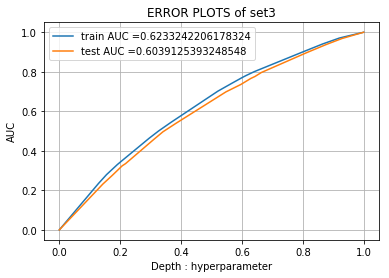

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

best_depth=4
min_sample_split=10
clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=min_sample_split,class_weight='balanced')
clf.fit(set3_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set3_tr)    
y_test_pred = batch_predict(clf, set3_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set3")
plt.grid()
plt.show()

In [42]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

the maximum value of tpr*(1-fpr) 0.3445351272019244 for threshold 0.517
the maximum value of tpr*(1-fpr) 0.33250951120513306 for threshold 0.517


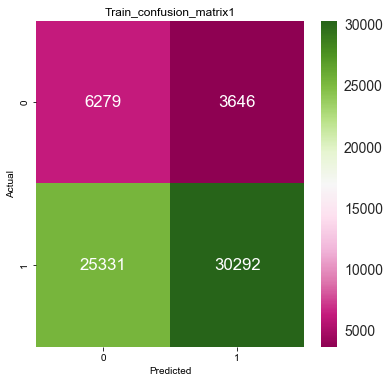

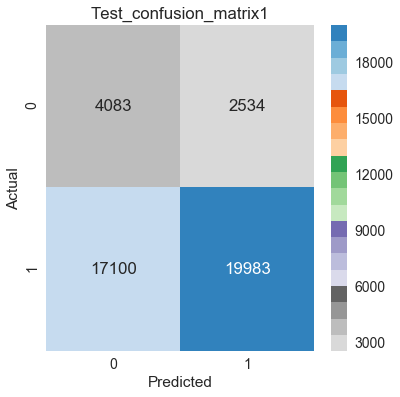

In [43]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

In [44]:
fpr_set3=set3_test

In [48]:
app=[]
fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.517 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    fpr_values.append(fpr_set3.iloc[app[j],:]) 
fpr_set3_te=pd.DataFrame(fpr_values)   

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer14 = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=3000)
vectorizer14.fit_transform(fpr_set3_te['processed_essays'].values) # fit has to happen only on train data


<2534x2989 sparse matrix of type '<class 'numpy.int64'>'
	with 239012 stored elements in Compressed Sparse Row format>

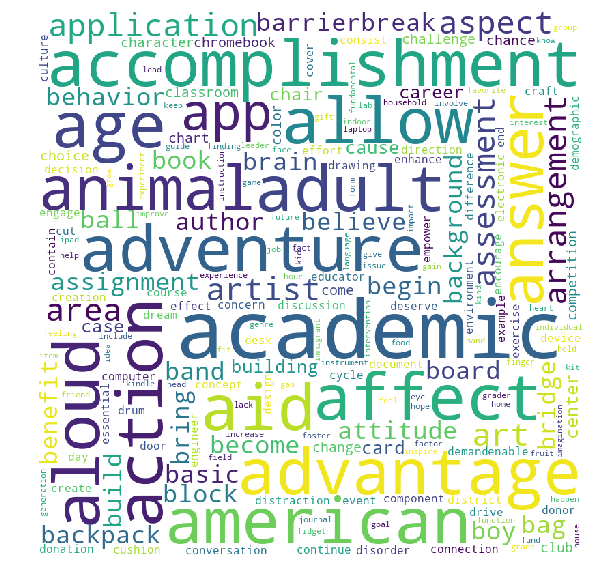

In [50]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in list(vectorizer14.get_feature_names()): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


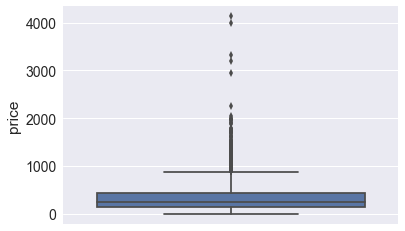

In [54]:
app=[]
y_fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.517 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    y_fpr_values.append(y_test[app[j]]) 

fpr_set3_te["fpr_y"]=y_fpr_values
sns.boxplot(y='price', hue="fpr_y",data=fpr_set3_te)
plt.show()



C:\Users\thribhuvan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



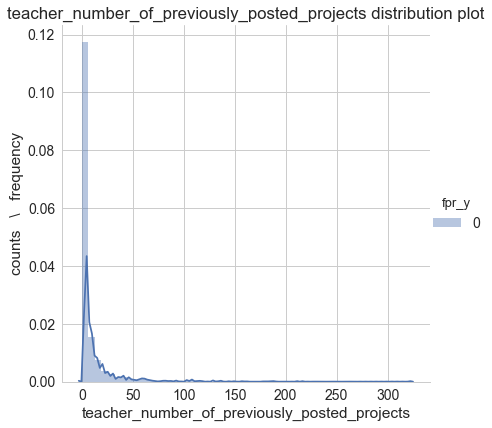

In [55]:
sns.set_style("whitegrid");
sns.FacetGrid(fpr_set3_te,hue="fpr_y", size=6) \
   .map(sns.distplot,'teacher_number_of_previously_posted_projects')\
   .add_legend();
plt.ylabel('counts   \   frequency')
plt.title('teacher_number_of_previously_posted_projects distribution plot')
plt.show();

## set4

In [31]:
# Please write all the code with proper documentationfrom sklearn.model_selection import train_test_split
set4_train, set4_test, y_train, y_test = train_test_split(set1, y, test_size=0.40, stratify=y)
print(set4_train.shape,y_train.shape)
print(set4_test.shape,y_test.shape)

(65548, 10) (65548,)
(43700, 10) (43700,)


In [32]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(set4_train['processed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [35]:
#tfidf w2vec on train model
tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(set4_train['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays.append(vector)

print(len(tfidf_w2v_essays))
print(len(tfidf_w2v_essays[0]))# average Word2Vec
# compute average word2vec for each review.



100%|████████████████████████████████████| 65548/65548 [12:19<00:00, 88.59it/s]


65548
300


In [36]:
#tfidf W2vec of test model
tfidf_w2v_essays_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(set4_test['processed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_test.append(vector)

print(len(tfidf_w2v_essays_test))
print(len(tfidf_w2v_essays_test[0]))# average W

100%|███████████████████████████████████| 43700/43700 [07:03<00:00, 103.17it/s]


43700
300


In [37]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(set4_train['processed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [38]:
tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (set4_train['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))# average Word2Vec
# compute average word2vec for each review.



65548
300


In [39]:
tfidf_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (set4_test['processed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_test.append(vector)

print(len(tfidf_w2v_titles_test))
print(len(tfidf_w2v_titles_test[1]))# average Word2Vec
# compute average word2vec for each review.


43700
300


In [40]:
#concatinating all the feautres of given in set1
from scipy.sparse import hstack
set4_tr = hstack((tfidf_w2v_essays,tfidf_w2v_titles,set1_train_state_ohe,set1_train_categories_ohe,set1_train_subcategories_ohe,set1_train_grade_ohe,set1_train_prefix_ohe,set1_train_price_norm,set1_train_previously_posted_norm)).tocsr()
set4_te = hstack((tfidf_w2v_titles_test,tfidf_w2v_titles_test,set1_test_state_ohe,set1_test_categories_ohe,set1_test_subcategories_ohe,set1_test_grade_ohe,set1_test_prefix_ohe,set1_test_price_norm,set1_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(set4_tr.shape, y_train.shape)
print(set4_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(65548, 702) (65548,)
(43700, 702) (43700,)


In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# https://qiita.com/bmj0114/items/8009f282c99b77780563 code got from here


model = DecisionTreeClassifier(class_weight= "balanced")

max_depth = [1,5,10,50,100]
min_samples_split=[5,10,15,25,100]


grid = {'max_depth': max_depth,
        'min_samples_split':min_samples_split}

clf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, 
                             cv=5, verbose=2, return_train_score=True,scoring='roc_auc')


clf.fit(set4_tr, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 13.8min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed: 553.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 5, 10, 50, 100], 'min_samples_split': [5, 10, 15, 25, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

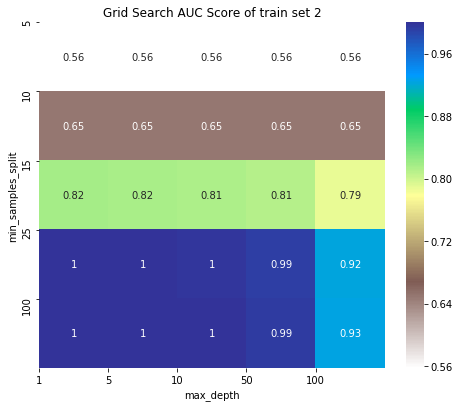

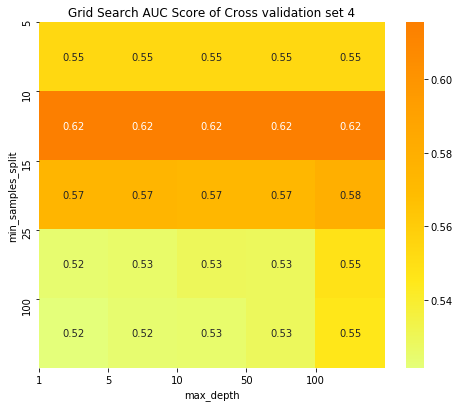

In [45]:
#scores = clf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(min_samples_leaf))

train_auc= clf.cv_results_['mean_train_score'].reshape(len(max_depth),len(min_samples_split))
train_auc_std= clf.cv_results_['std_train_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))
cv_auc_std= clf.cv_results_['std_test_score'].reshape(len(max_depth),len(min_samples_split))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(train_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(corr, mask=mask, vmax=.3, square=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
sns.heatmap(train_auc, cmap="terrain_r",annot=True)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of train set 2')
plt.show()


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
#sns.heatmap(cv_auc,vmax=.3, square=True)
sns.heatmap(cv_auc, cmap="Wistia",annot=True)
#plt.imshow(cv_auc, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
#plt.colorbar()
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(max_depth)),min_samples_split)
plt.title('Grid Search AUC Score of Cross validation set 4')
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

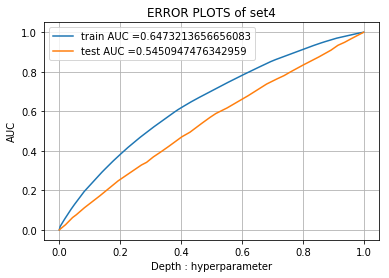

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

best_depth=5
min_sample_split=6
clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=min_sample_split,class_weight='balanced')
clf.fit(set4_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set4_tr)    
y_test_pred = batch_predict(clf, set4_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Depth : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set4")
plt.grid()
plt.show()

In [52]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
Train_confusion_matrix=(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
Test_confusion_matrix=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

the maximum value of tpr*(1-fpr) 0.3711018334069895 for threshold 0.511
the maximum value of tpr*(1-fpr) 0.2873509539117147 for threshold 0.54


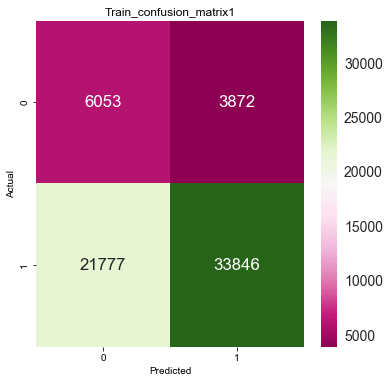

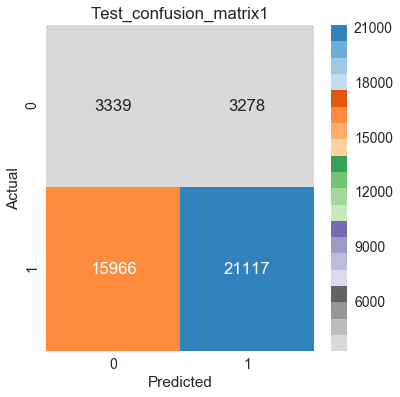

In [53]:
#https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_cm = pd.DataFrame(Train_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Train_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="PiYG", annot=True,fmt="d")# font size

#Test_confusion_matrix
df_cm = pd.DataFrame(Test_confusion_matrix)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
plt.title("Test_confusion_matrix1")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="tab20c_r",annot=True,fmt="d")# font si

In [61]:
fpr_set4=set4_test

In [62]:
app=[]
fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.54 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    fpr_values.append(fpr_set4.iloc[app[j],:])
fpr_set4_te=pd.DataFrame(fpr_values)   
    
    

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer13 = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=3000)
vectorizer13.fit_transform(fpr_set4_te['processed_essays'].values) # fit has to happen only on train data

<3278x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 307858 stored elements in Compressed Sparse Row format>

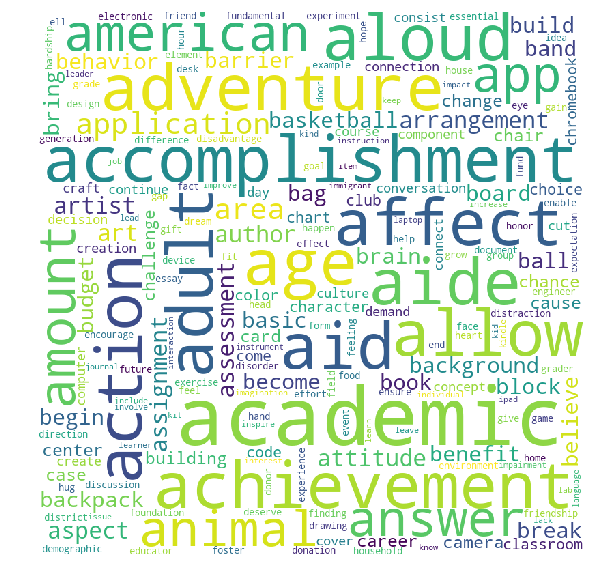

In [65]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in list(vectorizer13.get_feature_names()): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


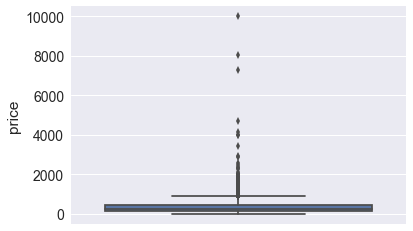

In [67]:
import seaborn as sns
app=[]
y_fpr_values=[]
for i in range(0,len(y_test)):
    if (y_test_pred[i] >= 0.54 and y_test[i]==0):
        app.append(i)
for j in range(0,len(app)):
    y_fpr_values.append(y_test[app[j]]) 

fpr_set4_te["fpr_y"]=y_fpr_values
sns.boxplot(y='price', hue="fpr_y",data=fpr_set4_te)
plt.show()



C:\Users\thribhuvan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



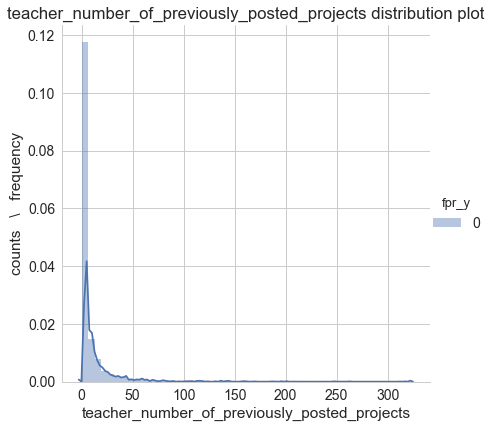

In [69]:
sns.set_style("whitegrid");
sns.FacetGrid(fpr_set4_te,hue="fpr_y", size=6) \
   .map(sns.distplot,'teacher_number_of_previously_posted_projects')\
   .add_legend();
plt.ylabel('counts   \   frequency')
plt.title('teacher_number_of_previously_posted_projects distribution plot')
plt.show();

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [154]:
set2_fi=clf1.feature_importances_
import pandas as pd

In [164]:
indice=np.argsort(set2_fi)[::-1]
importantce=indice[0:5001]

In [ ]:
set2_5k_imp=set2_tr[:,importantce]

In [204]:
set2_5k_imp=set2_tr[:,importantce]

In [207]:
set2_5k_imp.shape
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

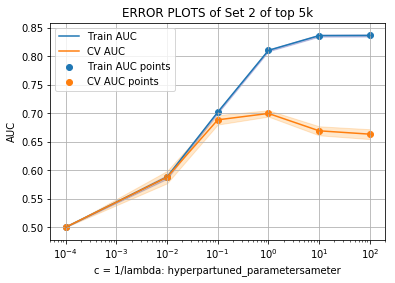

In [208]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
tuned_parameters = {'C': [10**-4, 10**-2, 10**-1,10**0,10**1, 10**2]}

clf = GridSearchCV(LogisticRegression(penalty='l1',class_weight='balanced'), param_grid=tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(set2_5k_imp, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xscale('log')
plt.xlabel("c = 1/lambda: hyperpartuned_parametersameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of Set 2 of top 5k")
plt.grid()
plt.show()

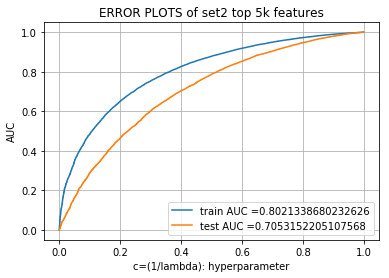

In [213]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc

best_lambda=1
clf = LogisticRegression(C=best_lambda, penalty='l1',class_weight='balanced')
clf.fit(set2_5k_imp, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, set2_5k_imp)    
y_test_pred = batch_predict(clf, set2_te[:,importantce])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("c=(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS of set2 top 5k features")
plt.grid()
plt.show()

<h1>3. Conclusion</h1>

In [16]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["vectoriser", "model", "bestdepth" ,"max-split", "AUC of test"]
x.add_row(["BOW", 'Brute', 8,15, 62])
x.add_row(["TFIDF", 'Brute', 5,15,61.2])
x.add_row(["avgWord2vec", 'Brute',4,10,60.3])
x.add_row(["tfidfWord2vec", 'Brute',5,6,55])
x.add_row(["SET-5", "Brute","logreg-lambda", 1, 71])
print(x)

+---------------+-------+---------------+-----------+-------------+
|   vectoriser  | model |   bestdepth   | max-split | AUC of test |
+---------------+-------+---------------+-----------+-------------+
|      BOW      | Brute |       8       |     15    |      62     |
|     TFIDF     | Brute |       5       |     15    |     61.2    |
|  avgWord2vec  | Brute |       4       |     10    |     60.3    |
| tfidfWord2vec | Brute |       5       |     6     |      55     |
|     SET-5     | Brute | logreg-lambda |     1     |      71     |
+---------------+-------+---------------+-----------+-------------+
